In [348]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_PartiallyPurple/image (6).JPG'

In [349]:
image = cv2.imread(image_dir)
im_shape = np.shape(image)
print(im_shape)

(512, 512, 3)


In [350]:
def hsv_filter(im):
    image = im
    sp = np.shape(image)
    for i in range(sp[0]):
        for j in range(sp[1]):
            if image[i][j][2]<20:
                image[i][j] = np.array([0, 0, 0])
    return image    

In [351]:
def histogram_analysis(im):
    image = np.asarray(im, dtype=np.int8)
    im_shape = np.shape(im)
    res = np.zeros(shape=(3,256), dtype=np.int32)
    for i in range(im_shape[0]):
        for j in range(im_shape[1]):
            for k in range(im_shape[2]):
                val = image[i][j][k]
                if val>8:
                    res[k][val] = res[k][val] + 1
    plt.rcParams["figure.figsize"] = (6,6)
    ax = plt.gca()
    ax.set_xlim([0, 255])
    ax.set_ylim([0, 2500])
    plt.plot(np.linspace(0,255, 256,dtype=np.int16),res[0], 'r')
    plt.plot(np.linspace(0,255, 256,dtype=np.int16),res[1], 'g')
    plt.plot(np.linspace(0,255, 256,dtype=np.int16),res[2], 'b')
    # plt.plot(np.linspace(0,255, 256,dtype=np.int16),np.sum(res, axis=0), 'k')

In [352]:
def statistic_extractor(image):
    im = np.asarray(image, dtype=np.float32)
    # create histogram
    shape = np.shape(im)
    total_pix = shape[0]*shape[1]

    (sumR, sumG, sumB) = (np.sum(im[:, :, 0]), np.sum(im[:, :, 1]), np.sum(im[:, :, 2]))
    meanR, meanG, meanB = sumR/total_pix, sumG/total_pix, sumB/total_pix
    stdR = np.sqrt(np.sum(np.square(np.subtract(im[:, :, 0],meanR))))
    stdG = np.sqrt(np.sum(np.square(np.subtract(im[:, :, 1],meanG))))
    stdB = np.sqrt(np.sum(np.square(np.subtract(im[:, :, 2],meanB))))

    skewR, skewG, skewB = skew(im[:, :, 0].flatten()), skew(im[:, :, 1].flatten()), skew(im[:, :, 2].flatten())
    kurtosisR, kurtosisG, kurtosisB = kurtosis(im[:, :, 0].flatten()), kurtosis(im[:, :, 1].flatten()), kurtosis(im[:, :, 2].flatten())
    return np.array([
        [meanR, meanG, meanB],
        [stdR, stdG, stdB],
        [skewR, skewG, skewB],
        [kurtosisR, kurtosisG, kurtosisB]
    ], dtype=object)

In [353]:
def find_bb(image):
    im = image
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
    # idx =0 
    for cnt in contours:
        # idx += 1
        x,y,w,h = cv2.boundingRect(cnt)
        if (w>50) and (h>100):
            # wid = int(max(h,w))
            # im=im[y-max(0,int((w-h)/2)):y+wid-max(0,int((w-h)/2)), x-max(0,int((h-w)/2)):x+wid-max(0,int((h-w)/2))]
            # im = im[y:y+h,x:x+w]
            # break
            return (x,y,w,h)

In [354]:
def draw_bb(im,data):
    res = np.copy(im)
    (x,y,w,h) = data
    return cv2.rectangle(res,(x,y),(x+w,y+h),(200,0,0),2)


In [355]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv = hsv_filter(image_hsv)
# th, image_hsv = cv2.threshold(image_hsv, 127, 255, cv2.THRESH_TOZERO)
(x,y,w,h) = find_bb(image_hsv)
croped_img = image_rgb[y:y+h,x:x+w]
image_rgb_bb = draw_bb(image_rgb, (x,y,w,h))



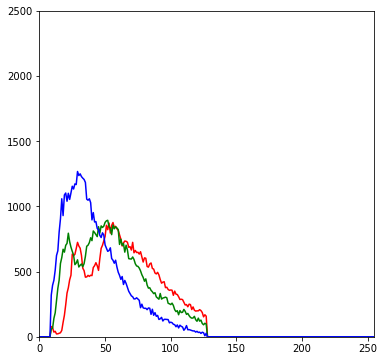

In [356]:
histogram_analysis(croped_img)

In [357]:
# print(np.around(statistic_extractor(image_hsv)))
# print(np.around(statistic_extractor(croped_img)))
# a=statistic_extractor(image_hsv)
b=statistic_extractor(croped_img)
# print(np.floor(a))
print(np.floor(b))

# print(np.shape(image[:, :, 1]))
# a = np.split(image, indices_or_sections=2, axis=2)
# print(np.shape(a))

[[33 46 55]
 [7473 9592 10593]
 [0 0 0]
 [0 -1 -1]]


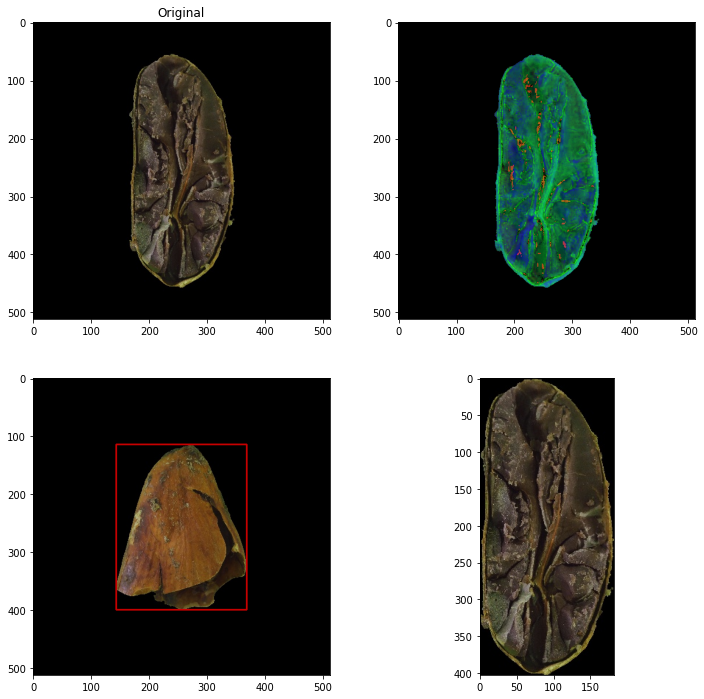

In [358]:
plt.rcParams["figure.figsize"] = (12,12)
plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(image_rgb)
plt.subplot(2,2,2)
plt.imshow(image_hsv)
plt.subplot(2,2,3)
plt.imshow(image_hsv_bb)
plt.subplot(2,2,4)
plt.imshow(croped_img)
plt.show()